TEAM MEMBERS :
- Malak Fathy Abdelaal Ali    20237014
- Mennatallah Mohammad Ahmad Ali 20236143
- Alaa Mohammad Taher 20237002
- Farah amr salah 20237021
- Nour mohamed farouk 20237018


**Data Loading And Inital Exploration**

In [68]:
import pandas as pd
import numpy as np

In [69]:
 #loading data
df = pd.read_csv(r"C:\Users\20100\Downloads\Uber Request Data.csv", delimiter='\t')

In [70]:
#check first 5
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


**Data Preprocessing**

In [71]:
#uniform date time format
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'], format='mixed')
df['Drop timestamp']=df['Drop timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')
df['Request timestamp']=pd.to_datetime(df['Request timestamp'], format='mixed')
df['Request timestamp']=df['Request timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')

In [72]:
#check for duplicates
df.duplicated().unique()

array([False])

there's no duplicate rows

In [73]:
#check for inconsitent formatting in strings
df['Pickup point'].value_counts()

Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

In [74]:
df['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

no inconsistencies

In [75]:
#make sure no integers are stored as objects/strings
print(df.select_dtypes(include='object').columns)

Index(['Pickup point', 'Status', 'Request timestamp', 'Drop timestamp'], dtype='object')


In [76]:
#check for nulls
print(df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [77]:
#check the number of missing cells
totalCells=df.size
missingCells=df.isnull().sum().sum()
print("total cells ", totalCells)
print("missing cells", missingCells)
print("percentage= ",(missingCells/totalCells)*100)


total cells  40470
missing cells 6564
percentage=  16.219421793921423


In [78]:
#chech what columns have nulls in each status
df[df['Status']=='Trip Completed'].isnull().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

In [79]:
df[df['Status']=='Cancelled'].isnull().sum()

Request id              0
Pickup point            0
Driver id               0
Status                  0
Request timestamp       0
Drop timestamp       1264
dtype: int64

since the trip is cancelled it's logical to be no drop time and date

In [80]:
df[df['Status']=='No Cars Available'].isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       2650
dtype: int64

it's also logical there's no driver or drop time and date

In [81]:
#create new data frame for each status
completed=df[df['Status']=='Trip Completed'].copy()
cancelled=df[df['Status']=='Cancelled'].copy()
carsUnaivalable=df[df['Status']=='No Cars Available'].copy()

In [82]:
#delete columns that are not applicable in each data frame
#axis=1 to drop columns
#how='all' to only drop columns are completely null which in our case are all columns that contain nulls
cancelled=cancelled.dropna(axis=1,how='all')
cancelled.isnull().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
dtype: int64

In [83]:
carsUnaivalable=carsUnaivalable.dropna(axis=1,how='all')
carsUnaivalable.isnull().sum()

Request id           0
Pickup point         0
Status               0
Request timestamp    0
dtype: int64

In [84]:
#uniform date time format
completed['Drop timestamp']=pd.to_datetime(completed['Drop timestamp'], format='mixed')
completed['Request timestamp']=pd.to_datetime(completed['Request timestamp'], format='mixed')
cancelled['Request timestamp']=pd.to_datetime(cancelled['Request timestamp'], format='mixed')
carsUnaivalable['Request timestamp']=pd.to_datetime(carsUnaivalable['Request timestamp'], format='mixed')


In [85]:
completed.head(25)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


**Feature Engineering**

In [86]:
#split each to 2 columns
completed['Drop date']=completed['Drop timestamp'].dt.date
completed['Drop time']=completed['Drop timestamp'].dt.time
completed['Request date']=completed['Request timestamp'].dt.date
completed['Request time']=completed['Request timestamp'].dt.time

cancelled['Request date']=cancelled['Request timestamp'].dt.date
cancelled['Request time']=cancelled['Request timestamp'].dt.time

carsUnaivalable['Request date']=carsUnaivalable['Request timestamp'].dt.date
carsUnaivalable['Request time']=carsUnaivalable['Request timestamp'].dt.time

In [87]:
# function to get time slot
def time_slot(hour):
    if pd.isnull(hour):
        return None
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

#features for request timestamps for completed rides
completed['Requested hours']=completed['Request timestamp'].dt.hour+completed['Request timestamp'].dt.minute/60
#completed['Requested mins']=completed['Request timestamp'].dt.minute
completed['Requested day']=completed['Request timestamp'].dt.day
completed['Requested dayofweek']=completed['Request timestamp'].dt.dayofweek
completed['Requested month']=completed['Request timestamp'].dt.month
completed['Request TimeSlot'] = completed['Requested hours'].apply(time_slot)

#features for drop timestamps for completed rides
completed['drop hours']=completed['Drop timestamp'].dt.hour+completed['Drop timestamp'].dt.minute/60
#completed['drop mins']=completed['Drop timestamp'].dt.minute
completed['drop day']=completed['Drop timestamp'].dt.day
completed['drop dayofweek']=completed['Drop timestamp'].dt.dayofweek
completed['drop month']=completed['Drop timestamp'].dt.month
completed['drop TimeSlot'] = completed['drop hours'].apply(time_slot)

#time duration for completed rides
completed['Time duration']=(completed['Drop timestamp']-completed['Request timestamp']).dt.total_seconds()/60

#features for request timestamps for cancelled rides
cancelled['Requested hours']=cancelled['Request timestamp'].dt.hour+cancelled['Request timestamp'].dt.minute/60
#cancelled['Requested mins']=cancelled['Request timestamp'].dt.minute
cancelled['Requested day']=cancelled['Request timestamp'].dt.day
cancelled['Requested dayofweek']=cancelled['Request timestamp'].dt.dayofweek
cancelled['Requested month']=cancelled['Request timestamp'].dt.month
cancelled['Request TimeSlot'] = cancelled['Requested hours'].apply(time_slot)

#features for request timestamps for cancelled rides
carsUnaivalable['Requested hours']=carsUnaivalable['Request timestamp'].dt.hour+carsUnaivalable['Request timestamp'].dt.minute/60
#carsUnaivalable['Requested mins']=carsUnaivalable['Request timestamp'].dt.minute
carsUnaivalable['Requested day']=carsUnaivalable['Request timestamp'].dt.day
carsUnaivalable['Requested dayofweek']=carsUnaivalable['Request timestamp'].dt.dayofweek
carsUnaivalable['Requested month']=carsUnaivalable['Request timestamp'].dt.month
carsUnaivalable['Request TimeSlot'] = carsUnaivalable['Requested hours'].apply(time_slot)

**Data Visualization**

In [88]:

'''completed['Request TimeSlot'] = completed['Requested hours'].apply(time_slot)
carsUnaivalable['Request TimeSlot'] = carsUnaivalable['Requested hours'].apply(time_slot)
graphB1 = df.groupby(['Request TimeSlot'])['Status'].value_counts().unstack()
graphB1['Total'] = graphB1.sum(axis=1)
graphB1['No Cars Available Count'] = graphB1.get('No Cars Available', 0)'''

#.plot(kind='bar', stacked=True, figsize=(10, 6))

# Group by Driver ID and calculate total and cancelled requests
driver_stats = df[df['Driver id'].notnull()].groupby('Driver id').agg(
    total_requests=('Request id', 'count'),
    cancelled_requests=('Status', lambda x: (x == 'Cancelled').sum())
)

# Calculate cancellation rate
driver_stats['cancellation_rate'] = driver_stats['cancelled_requests'] / driver_stats['total_requests']

# Since index is Driver id, bring it back as a column
driver_stats = driver_stats.reset_index()

# Calculate correlation
correlation = driver_stats['Driver id'].corr(driver_stats['cancellation_rate'])

print(f"Correlation between Driver ID (newness) and cancellation rate: {correlation:.4f}")


Correlation between Driver ID (newness) and cancellation rate: 0.0951


A very weak positive correlation between cancellations and the newness of a driver
This means there's little to no linear relation between them

 **GRAPH 1**

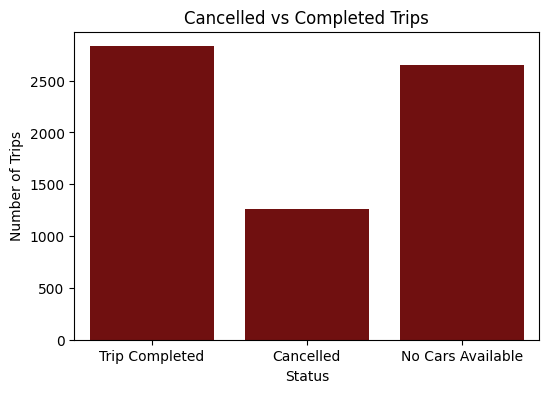

In [89]:


# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot (width=6, height=4 inches)
plt.figure(figsize=(6, 4))

# Create a count plot of the number of trips per status category 
sns.countplot(x='Status', data=df, color='maroon')

# Set the title of the plot
plt.title('Cancelled vs Completed Trips')

# Set the label for the y-axis
plt.ylabel('Number of Trips')

# Display the plot
plt.show()

- Insight 1: High Number of Completed Trips
The "Trip Completed" category has the highest count, slightly more than "No Cars Available".
This indicates that many requests are successfully completed, showing overall good service fulfillment.

 - Insight 2: Significant “No Cars Available” Issue
"No Cars Available" is almost as high as completed trips.
This suggests supply-demand mismatch- particularly during peak hours or in high-demand areas.

- Insight 3: Cancellations Are Lowest
The "Cancelled" category has the lowest bar.
Users rarely cancel after making a request, indicating:
Good user intent.
Possibly long wait times or driver-side issues aren't the main problem—availability is.

**GRAPH 2**

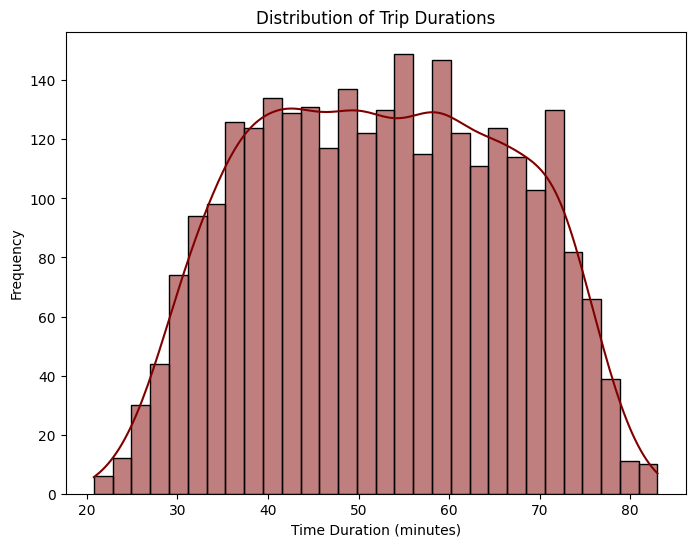

In [90]:
# Set the figure size to make the plot more readable
plt.figure(figsize=(8, 6))

# Plot a histogram of trip durations with a KDE curve to show distribution shape
sns.histplot(completed['Time duration'], bins=30, kde=True, color='maroon')

# Set the title of the plot
plt.title('Distribution of Trip Durations')

# Label the x-axis to indicate what the data represents
plt.xlabel('Time Duration (minutes)')

# Label the y-axis to show the frequency of trips in each duration range
plt.ylabel('Frequency')

# Display the final plot
plt.show()

Most trips appear to cluster around 50-60 minutes, suggesting this is the typical trip duration.

**GRAPH 3**

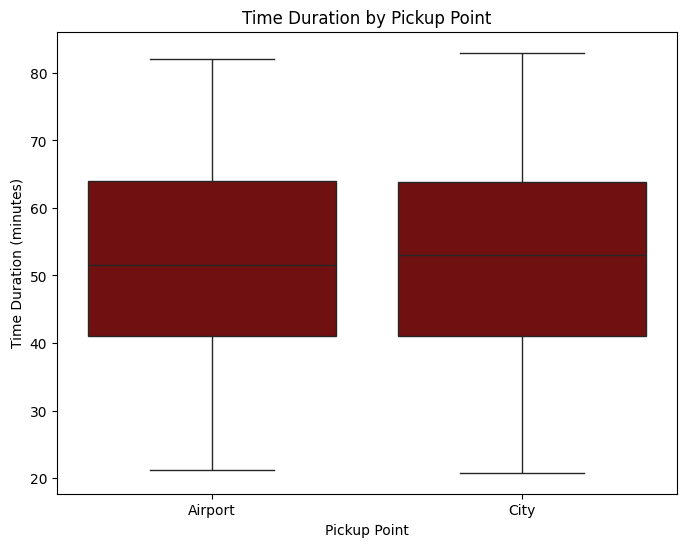

In [91]:
# Set the size of the figure (width=8, height=6 )
plt.figure(figsize=(8, 6))

# Create a box plot to compare time duration of trips for each pickup point (City vs Airport)
sns.boxplot(x='Pickup point', y='Time duration', data=completed, color='maroon')

# Set the title of the plot
plt.title('Time Duration by Pickup Point')

# Label for the y-axis
plt.ylabel('Time Duration (minutes)')

# Label for the x-axis
plt.xlabel('Pickup Point')

# Display the plot
plt.show()

Both pickup points show almost identical median trip durations of approximately 52 minutes
Both pickup points show the same minimum (20 minutes) and maximum 85 minutes trip durations, as indicated by the whiskers.

**GRAPH 4**

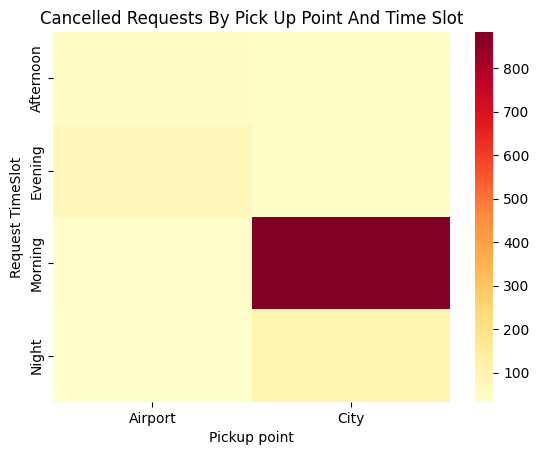

In [92]:
heatmap_data = cancelled.groupby(['Pickup point', 'Request TimeSlot']).size().reset_index(name='count')
pivot_table = heatmap_data.pivot( columns='Pickup point',index='Request TimeSlot', values="count")

sns.heatmap(pivot_table, cmap="YlOrRd")
plt.title("Cancelled Requests By Pick Up Point And Time Slot")
plt.show()

Insight

	•	City Requests during the morning show extremely high cancellation rates.
	•   Drivers near tye airport go there to specifically take rides and customers don't have a lot of options so there are few cancellations

Interpretation

	•	Customers may cancel due to more alternatives in the city (e.g. public transport, walking, other apps).

	•	Drivers may cancel due to personal preferences or mismatches.
	
	•	At the airport, both customer and driver have fewer cancellation reasons.



**GRAPH 5**

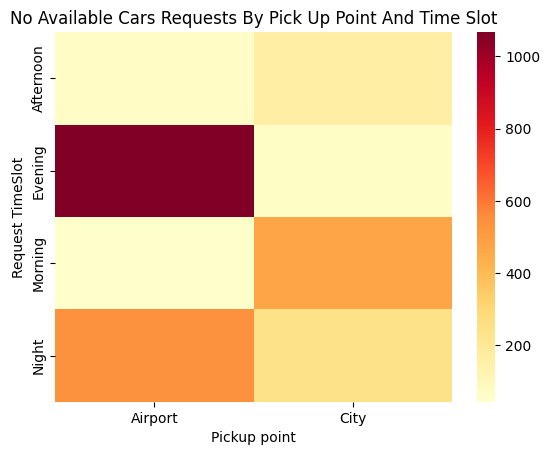

In [93]:
heatmap_data = carsUnaivalable.groupby(['Pickup point', 'Request TimeSlot']).size().reset_index(name='count')
pivot_table = heatmap_data.pivot( columns='Pickup point',index='Request TimeSlot', values="count")

sns.heatmap(pivot_table, cmap="YlOrRd")
plt.title("No Available Cars Requests By Pick Up Point And Time Slot")
plt.show()


Insight

	•	High car unavailability at the airport during evening and night slots.

Interpretation

	•	Indicates a demand-supply mismatch during these periods.
	
	•	Likely peak hours at the airport with insufficient driver availability.



**GRAPH 6**

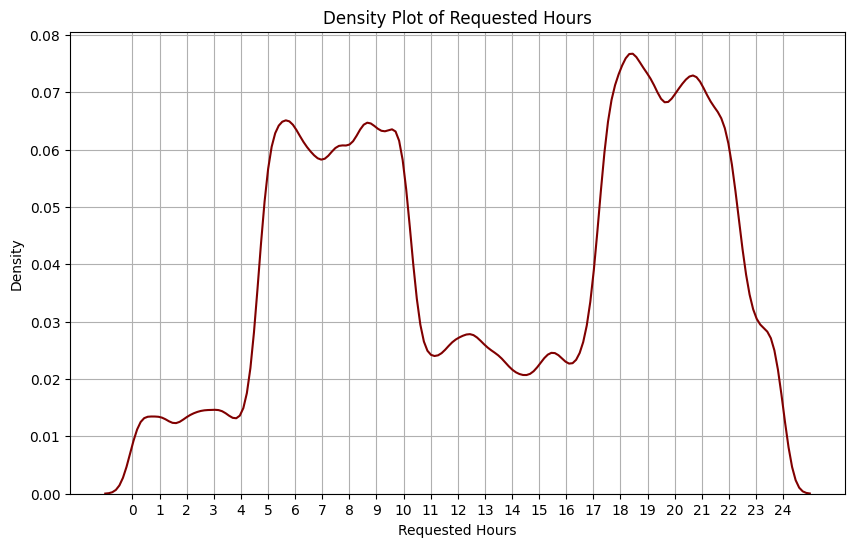

In [94]:
all_requests = pd.concat([completed, cancelled, carsUnaivalable])
plt.figure(figsize=(10, 6))
sns.kdeplot(all_requests['Requested hours'],bw_adjust=0.3, color='maroon' ,fill=False)
plt.xticks(np.arange(0,25,1))
plt.title("Density Plot of Requested Hours")
plt.xlabel("Requested Hours")
plt.ylabel("Density")
plt.grid(True)
plt.show()

Insight
Rush hours are between 
5-10 am and 5-10 pm 

**GRAPH 7**

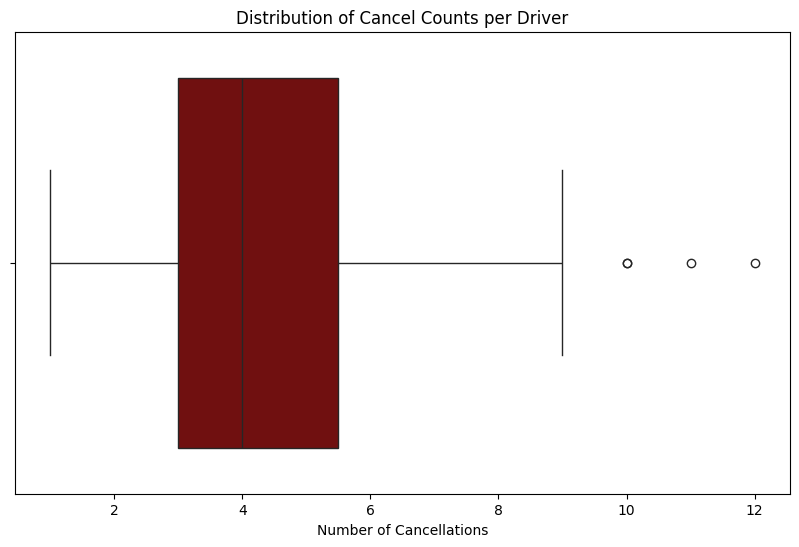

In [95]:
cancel_counts = cancelled.groupby('Driver id').size().reset_index(name='Cancel Count')
plt.figure(figsize=(10, 6))
sns.boxplot(x=cancel_counts['Cancel Count'],color='maroon')
plt.title('Distribution of Cancel Counts per Driver')
plt.xlabel('Number of Cancellations')
plt.show()


Insight

	•	Most drivers have a reasonable number of cancellations.

	•	A small group cancels more than 9 times – they are outliers.

Interpretation

	•	These drivers may be:
	•	Frequently unreliable,
	•	Technically limited,
	•	Or have poor profiles that cause customer-side cancellations.


In [96]:
#all the drivers that exceed the upper bound of cancellations
cancel_counts[cancel_counts['Cancel Count'] > 9]


,Driver id,Cancel Count
50,54.0,11
78,84.0,12
136,142.0,10
200,206.0,10


In [97]:
#drivers that completed the most rides
completed.groupby('Driver id').size().reset_index(name='Completed Count').sort_values(by='Completed Count', ascending=False).head(3)

,Driver id,Completed Count
21,22.0,16
232,233.0,15
183,184.0,15


**K-Means Clustering**

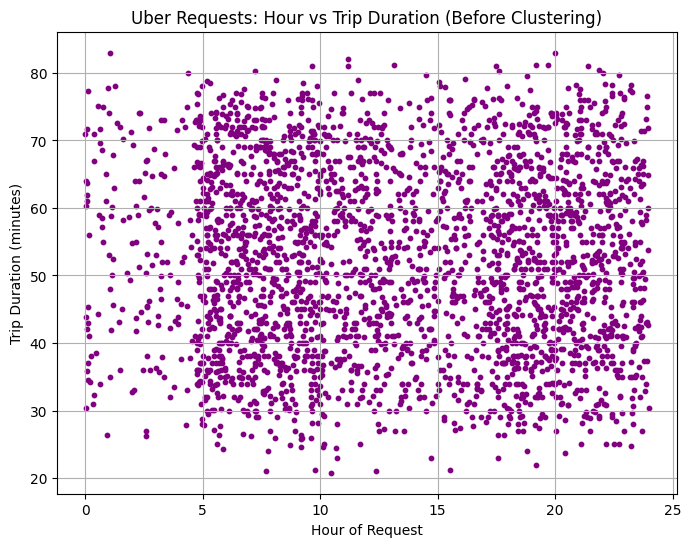

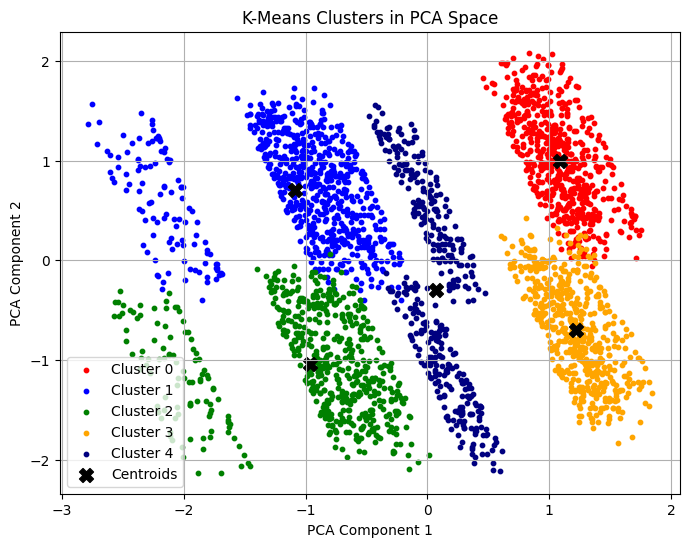

Pickup point count per cluster:
Cluster  Pickup point
0        City            596
1        City            712
2        Airport         587
3        Airport         537
4        Airport         203
         City            196
dtype: int64

Average trip duration per cluster:
Cluster
0    51.783725
1    53.322144
2    52.162976
3    52.065239
4    52.571846
Name: Time duration, dtype: float64

Average Request Hour per cluster:
Cluster
0    16.987416
1     7.435721
2     7.212493
3    17.047269
4    22.385589
Name: Requested hours, dtype: float64

Time Slot Distribution per cluster:
Request TimeSlot  Afternoon  Evening  Morning  Night
Cluster                                             
0                       266      330        0      0
1                         0        0      601    111
2                         0        0      484    103
3                       225      312        0      0
4                         0        0        0    399


In [98]:
# Importing required libraries

import matplotlib.pyplot as plt # For plotting and visualizing data
from sklearn.cluster import KMeans # For K-Means clustering algorithm
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling features
from sklearn.decomposition import PCA  # For reducing feature dimensions (Principal Component Analysis)
import numpy as np # For numerical operations

# now im clustring the pick up location, based on certain features like:
#1) Request hour
#2)Request Time slot (morning,noon,night)
#3) Trip Duration

#GET THE DATA PREPARED:

# Encode categorical features
completed['PickupEncoded'] = LabelEncoder().fit_transform(completed['Pickup point'])# Convert pickup point (e.g., "Airport", "City") into numeric form using label encoding
completed['SlotEncoded'] = LabelEncoder().fit_transform(completed['Request TimeSlot'])# Convert the custom time slot column into numeric form using label encoding

# Create the feature matrix and scale
X = completed[['PickupEncoded', 'Requested hours', 'SlotEncoded', 'Time duration']].values #returns the columns to 2D numpy array because KMEANS/sklearn library only expects input as numpy arrays
# Scale the features so they all have mean = 0 and standard deviation = 1, to prevent any data bias towards features with bigger values in the clustring
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #calculates mean & std dev from X (fit) and then scales X so that each feature has zero mean and unit variance(transform).



#  Clustering with KMeans
n_clusters = 5 #k=5 provided in the project
kmeans = KMeans(n_clusters=n_clusters, random_state=0) 
#K-Means initializes cluster centroids randomly, and this can lead to different clustering results on different runs.
#To ensure that I get the same clustering results every time I run the code, I fix the randomness using random_state=0 (or any integer).
#This makes the initialization consistent across runs.

y_pred = kmeans.fit_predict(X_scaled)# Get cluster labels for each data point

completed['Cluster'] = y_pred # Add the cluster result as a new column

#Before Clustring Visual
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 3], color='purple', s=10) # X = Requested hour, Y = Trip duration
plt.xlabel('Hour of Request')
plt.ylabel('Trip Duration (minutes)')
plt.title('Uber Requests: Hour vs Trip Duration (Before Clustering)')
plt.grid(True)
plt.show()


#  PCA for 2D visualization
# Reduce the dimensionality of the dataset from 4D to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)# Transform original data to 2 principal components
centroids_pca = pca.transform(kmeans.cluster_centers_) # Project the centroids into the same space

# Plot PCA-based clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'navy'] #plot each with diffrent color
for i in range(n_clusters):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], s=10, color=colors[i], label=f'Cluster {i}')#takes all the points in cluster i and gets their x axis and their y axis values , sets the dots size, and the color, and the label for each cluster

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='X', s=100, label='Centroids') #2D array where each row is a cluster centroid’s coordinates after applying PCA, centroids_pca[:, 0],centroids_pca[:, 1], get all rows centroids 

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters in PCA Space')
plt.legend()
plt.grid(True)
plt.show()

# Cluster insights
print("Pickup point count per cluster:")
print(completed.groupby(['Cluster', 'Pickup point']).size())

print("\nAverage trip duration per cluster:")
print(completed.groupby('Cluster')['Time duration'].mean()
      )
print("\nAverage Request Hour per cluster:")
print(completed.groupby('Cluster')['Requested hours'].mean())

print("\nTime Slot Distribution per cluster:")
print(completed.groupby(['Cluster','Request TimeSlot']).size().unstack(fill_value=0))


OUR RECOMMENDATIONS: 

    •   Uber might need to deploy more drivers or increase cars. (GRAPH1)

    •   Optimize Resources for Peak Durations: Since most trips range 30 to 70 minutes, focusing efforts (like scheduling, fuel consumption, or staffing) on this range would improve efficiency. (GRAPH2 )

    •	Introduce higher cancellation fees in the city during morning hours for both drivers and customers. (GRAPH4)
    
	•	Increase car availability at the airport during evening/night (e.g. driver incentives).(GRAPH5)
	•	Monitor demand regularly to optimize allocation.(GRAPH 5)
    
    •    Maintain clear and positive communication with customers, particularly during peak periods when wait times may be longer. This can help manage expectations and prevent frustration. (GRAPH6)
    •   Optimize application performance to handle increased volume of customers between those hours.(GRAPH6)

	•	Investigate drivers with >9 cancellations.(GRAPH 7)
	•	Review customer feedback.(GRAPH 7)
	•	Monitor future behavior.(GRAPH 7)
	•	Consider retraining or account evaluation if needed.(GRAPH 7)
    •   Offer limited-time discounts, bundles, or special promotions to incentivize purchases during peak hours.(GRAPH 7)



